# Diaptera wings classification using Topological Data Analysis

Guilherme Vituri F. Pinto [](https://orcid.org/0000-0002-7813-8777) (Universidade Estadual Paulista)  
Sergio UraNorthonFebruary 10, 2026

We studied etc etc etc etc etc etc etc etc etc etc etc etc etc etc etc etc etc etc etc etc etc etc etc etc etc etc etc etc etc etc etc etc etc etc etc etc etc etc etc etc etc etc

In [1]:
using TDAfly, TDAfly.Preprocessing, TDAfly.TDA, TDAfly.Analysis
using Images: mosaicview
using Plots: plot, display, heatmap, scatter
using StatsPlots: boxplot
using PersistenceDiagrams

## 1 Introduction

Falar sobre o dataset, TDA, etc.

## 2 Methods

All images are in the `images/processed` directory. For each image, we load it, apply a gaussian blur, crop and make it have 150 pixels of height. The blurring step is necessary to “glue” small holes in the figure and keep it connected.

In [2]:
paths = readdir("images/processed", join = true)
species = basename.(paths) .|> (x -> replace(x, ".png" => ""));

# Extract family name from filename, normalizing typos and separators
function extract_family(name)
    family_raw = lowercase(split(name, r"[\s\-]")[1])
    if family_raw in ("bibionidae", "biobionidae")
        return "Bibionidae"
    elseif family_raw in ("sciaridae", "scaridae")
        return "Sciaridae"
    else
        return titlecase(family_raw)
    end
end

families = extract_family.(species)

individuals = map(species) do specie
    parts = split(specie, r"[\s\-]")
    string(extract_family(specie)[1]) * "-" * parts[end]
end

wings = load_wing.(paths, blur = 1.3)
Xs = map(image_to_r2, wings);


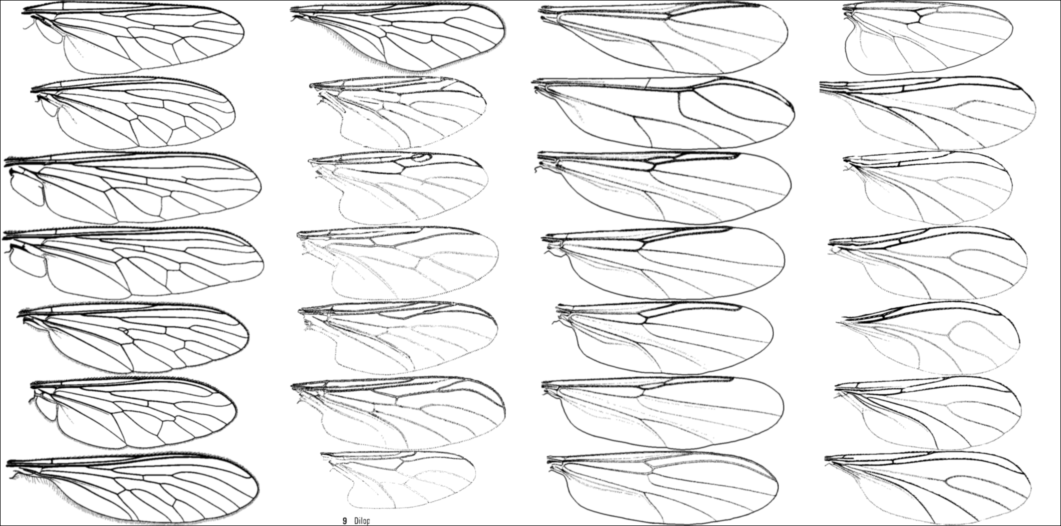

In [3]:
mosaicview(wings, ncol = 4, fillvalue=1)

### 2.1 Vietoris-Rips filtration

We select 1000 points from each image using a farthest point sample method

In [4]:
samples = map(Xs) do X
  farthest_points_sample(X, 1000)
end;

and create an empty dictionary to store all computations

In [5]:
simple_rips_dc = Dict();

We then calculate its persistence diagrams using the Vietoris-Rips filtration etc.

In [6]:
# get only the 1-dimensional PD
simple_rips_dc["PD"] = rips_pd.(samples, cutoff = 5, threshold = 200) .|> last;

We create the 1-dimensional persistence image for each persistence diagram using 10x10 matrices

In [7]:
PI = PersistenceImage(simple_rips_dc["PD"], size = (10, 10))

simple_rips_dc["PI"] = PI.(simple_rips_dc["PD"]);

#### 2.1.1 Examples

Below are some examples of 1-dimensional barcodes, its persistence image and the original wing that generated it. Note: we are plotting the barcode using the birth and persistence.

In [8]:
# plot one example per family
example_indices = [findfirst(==(f), families) for f in unique(families)]
map(example_indices) do i
  p = plot_wing_with_pd(simple_rips_dc["PD"][i], simple_rips_dc["PI"][i], samples[i], species[i])
  display(p)
end;

<?xml version="1.0" encoding="utf-8"?>
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
<path clip-path="url(#clip170)" d="M466.042 928.945 Q462.431 928.945 460.602 932.51 Q458.796 936.051 458.796 943.181 Q458.796 950.287 460.602 953.852 Q462.431 957.394 466.042 957.394 Q469.676 957.394 471.482 953.852 Q473.31 950.287 473.31 943.181 Q473.31 936.051 471.482 932.51 Q469.676 928.945 466.042 928.945 M466.042 925.241 Q471.852 925.241 474.907 929.848 Q477.986 934.431 477.986 943.181 Q477.986 951.908 474.907 956.514 Q471.852 961.097 466.042 961.097 Q460.232 961.097 457.153 956.514 Q454.097 951.908 454.097 943.181 Q454.097 934.431 457.153 929.848 Q460.232 925.241 466.042 925.241 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /> <path clip-path="url(#clip170)" d="M599.034 928.945 Q595.423 928.945 593.595 932.51 Q591.789 936.051 591.789 943.181 Q591.789 950.287 593.595 953.852 Q595.423 957.394 599.034 957.394 Q602.669 957.394 604.474 953.852 Q606.303 950.287 606.303 943.181 Q606.303 936.051 604.474 932.51 Q602.669 928.945 599.034 928.945 M599.034 925.241 Q604.844 925.241 607.9 929.848 Q610.979 934.431 610.979 943.181 Q610.979 951.908 607.9 956.514 Q604.844 961.097 599.034 961.097 Q593.224 961.097 590.145 956.514 Q587.09 951.908 587.09 943.181 Q587.09 934.431 590.145 929.848 Q593.224 925.241 599.034 925.241 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /><path clip-path="url(#clip170)" d="M682.722 956.491 L699.041 956.491 L699.041 960.426 L677.097 960.426 L677.097 956.491 Q679.759 953.736 684.342 949.107 Q688.948 944.454 690.129 943.111 Q692.374 940.588 693.254 938.852 Q694.157 937.093 694.157 935.403 Q694.157 932.649 692.212 930.912 Q690.291 929.176 687.189 929.176 Q684.99 929.176 682.536 929.94 Q680.106 930.704 677.328 932.255 L677.328 927.533 Q680.152 926.399 682.606 925.82 Q685.06 925.241 687.097 925.241 Q692.467 925.241 695.661 927.926 Q698.856 930.612 698.856 935.102 Q698.856 937.232 698.046 939.153 Q697.259 941.051 695.152 943.644 Q694.573 944.315 691.472 947.533 Q688.37 950.727 682.722 956.491 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /><path clip-path="url(#clip170)" d="M718.856 928.945 Q715.245 928.945 713.416 932.51 Q711.61 936.051 711.61 943.181 Q711.61 950.287 713.416 953.852 Q715.245 957.394 718.856 957.394 Q722.49 957.394 724.295 953.852 Q726.124 950.287 726.124 943.181 Q726.124 936.051 724.295 932.51 Q722.49 928.945 718.856 928.945 M718.856 925.241 Q724.666 925.241 727.721 929.848 Q730.8 934.431 730.8 943.181 Q730.8 951.908 727.721 956.514 Q724.666 961.097 718.856 961.097 Q713.045 961.097 709.967 956.514 Q706.911 951.908 706.911 943.181 Q706.911 934.431 709.967 929.848 Q713.045 925.241 718.856 925.241 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /><path clip-path="url(#clip170)" d="M811.744 941.792 Q815.101 942.51 816.976 944.778 Q818.874 947.047 818.874 950.38 Q818.874 955.496 815.355 958.297 Q811.837 961.097 805.355 961.097 Q803.179 961.097 800.865 960.658 Q798.573 960.241 796.119 959.384 L796.119 954.871 Q798.064 956.005 800.379 956.584 Q802.693 957.162 805.216 957.162 Q809.615 957.162 811.906 955.426 Q814.221 953.69 814.221 950.38 Q814.221 947.324 812.068 945.611 Q809.939 943.875 806.119 943.875 L802.091 943.875 L802.091 940.033 L806.304 940.033 Q809.753 940.033 811.582 938.667 Q813.411 937.278 813.411 934.686 Q813.411 932.024 811.513 930.612 Q809.638 929.176 806.119 929.176 Q804.198 929.176 801.999 929.593 Q799.8 930.01 797.161 930.889 L797.161 926.723 Q799.823 925.982 802.138 925.612 Q804.476 925.241 806.536 925.241 Q811.86 925.241 814.962 927.672 Q818.064 930.079 818.064 934.199 Q818.064 937.07 816.42 939.061 Q814.777 941.028 811.744 941.792 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /><path clip-path="url(#clip170)" d="M837.739 928.945 Q834.128 928.945 832.3 932.51 Q830.494 936.051 830.494 943.181 Q830.494 950.287 832.3 953.852 Q834.128 957.394 837.739 957.394 Q841.374 957.394 843.179 953.852 Q845.008 950.287 845.008 943.181 Q845.008 936.

<?xml version="1.0" encoding="utf-8"?>
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
<path clip-path="url(#clip290)" d="M466.042 928.945 Q462.431 928.945 460.602 932.51 Q458.796 936.051 458.796 943.181 Q458.796 950.287 460.602 953.852 Q462.431 957.394 466.042 957.394 Q469.676 957.394 471.482 953.852 Q473.31 950.287 473.31 943.181 Q473.31 936.051 471.482 932.51 Q469.676 928.945 466.042 928.945 M466.042 925.241 Q471.852 925.241 474.907 929.848 Q477.986 934.431 477.986 943.181 Q477.986 951.908 474.907 956.514 Q471.852 961.097 466.042 961.097 Q460.232 961.097 457.153 956.514 Q454.097 951.908 454.097 943.181 Q454.097 934.431 457.153 929.848 Q460.232 925.241 466.042 925.241 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /> <path clip-path="url(#clip290)" d="M598.742 928.945 Q595.131 928.945 593.302 932.51 Q591.497 936.051 591.497 943.181 Q591.497 950.287 593.302 953.852 Q595.131 957.394 598.742 957.394 Q602.376 957.394 604.182 953.852 Q606.011 950.287 606.011 943.181 Q606.011 936.051 604.182 932.51 Q602.376 928.945 598.742 928.945 M598.742 925.241 Q604.552 925.241 607.608 929.848 Q610.687 934.431 610.687 943.181 Q610.687 951.908 607.608 956.514 Q604.552 961.097 598.742 961.097 Q592.932 961.097 589.853 956.514 Q586.798 951.908 586.798 943.181 Q586.798 934.431 589.853 929.848 Q592.932 925.241 598.742 925.241 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /><path clip-path="url(#clip290)" d="M682.137 956.491 L698.457 956.491 L698.457 960.426 L676.512 960.426 L676.512 956.491 Q679.174 953.736 683.758 949.107 Q688.364 944.454 689.545 943.111 Q691.79 940.588 692.67 938.852 Q693.572 937.093 693.572 935.403 Q693.572 932.649 691.628 930.912 Q689.707 929.176 686.605 929.176 Q684.406 929.176 681.952 929.94 Q679.522 930.704 676.744 932.255 L676.744 927.533 Q679.568 926.399 682.022 925.82 Q684.475 925.241 686.512 925.241 Q691.883 925.241 695.077 927.926 Q698.271 930.612 698.271 935.102 Q698.271 937.232 697.461 939.153 Q696.674 941.051 694.568 943.644 Q693.989 944.315 690.887 947.533 Q687.785 950.727 682.137 956.491 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /><path clip-path="url(#clip290)" d="M718.271 928.945 Q714.66 928.945 712.832 932.51 Q711.026 936.051 711.026 943.181 Q711.026 950.287 712.832 953.852 Q714.66 957.394 718.271 957.394 Q721.906 957.394 723.711 953.852 Q725.54 950.287 725.54 943.181 Q725.54 936.051 723.711 932.51 Q721.906 928.945 718.271 928.945 M718.271 925.241 Q724.082 925.241 727.137 929.848 Q730.216 934.431 730.216 943.181 Q730.216 951.908 727.137 956.514 Q724.082 961.097 718.271 961.097 Q712.461 961.097 709.383 956.514 Q706.327 951.908 706.327 943.181 Q706.327 934.431 709.383 929.848 Q712.461 925.241 718.271 925.241 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /><path clip-path="url(#clip290)" d="M810.868 941.792 Q814.224 942.51 816.099 944.778 Q817.997 947.047 817.997 950.38 Q817.997 955.496 814.479 958.297 Q810.96 961.097 804.479 961.097 Q802.303 961.097 799.988 960.658 Q797.697 960.241 795.243 959.384 L795.243 954.871 Q797.187 956.005 799.502 956.584 Q801.817 957.162 804.34 957.162 Q808.738 957.162 811.03 955.426 Q813.345 953.69 813.345 950.38 Q813.345 947.324 811.192 945.611 Q809.062 943.875 805.243 943.875 L801.215 943.875 L801.215 940.033 L805.428 940.033 Q808.877 940.033 810.706 938.667 Q812.534 937.278 812.534 934.686 Q812.534 932.024 810.636 930.612 Q808.761 929.176 805.243 929.176 Q803.322 929.176 801.122 929.593 Q798.923 930.01 796.285 930.889 L796.285 926.723 Q798.947 925.982 801.261 925.612 Q803.599 925.241 805.659 925.241 Q810.984 925.241 814.085 927.672 Q817.187 930.079 817.187 934.199 Q817.187 937.07 815.544 939.061 Q813.9 941.028 810.868 941.792 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /><path clip-path="url(#clip290)" d="M836.863 928.945 Q833.252 928.945 831.423 932.51 Q829.618 936.051 829.618 943.181 Q829.618 950.287 831.423 953.852 Q833.252 957.394 836.863 957.394 Q840.497 957.394 842.303 953.852 Q844.132 950.287 844.132 943.

<?xml version="1.0" encoding="utf-8"?>
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
<path clip-path="url(#clip410)" d="M466.042 928.945 Q462.431 928.945 460.602 932.51 Q458.796 936.051 458.796 943.181 Q458.796 950.287 460.602 953.852 Q462.431 957.394 466.042 957.394 Q469.676 957.394 471.482 953.852 Q473.31 950.287 473.31 943.181 Q473.31 936.051 471.482 932.51 Q469.676 928.945 466.042 928.945 M466.042 925.241 Q471.852 925.241 474.907 929.848 Q477.986 934.431 477.986 943.181 Q477.986 951.908 474.907 956.514 Q471.852 961.097 466.042 961.097 Q460.232 961.097 457.153 956.514 Q454.097 951.908 454.097 943.181 Q454.097 934.431 457.153 929.848 Q460.232 925.241 466.042 925.241 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /> <path clip-path="url(#clip410)" d="M582.675 928.945 Q579.064 928.945 577.236 932.51 Q575.43 936.051 575.43 943.181 Q575.43 950.287 577.236 953.852 Q579.064 957.394 582.675 957.394 Q586.31 957.394 588.115 953.852 Q589.944 950.287 589.944 943.181 Q589.944 936.051 588.115 932.51 Q586.31 928.945 582.675 928.945 M582.675 925.241 Q588.486 925.241 591.541 929.848 Q594.62 934.431 594.62 943.181 Q594.62 951.908 591.541 956.514 Q588.486 961.097 582.675 961.097 Q576.865 961.097 573.787 956.514 Q570.731 951.908 570.731 943.181 Q570.731 934.431 573.787 929.848 Q576.865 925.241 582.675 925.241 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /><path clip-path="url(#clip410)" d="M650.004 956.491 L666.323 956.491 L666.323 960.426 L644.379 960.426 L644.379 956.491 Q647.041 953.736 651.624 949.107 Q656.23 944.454 657.411 943.111 Q659.656 940.588 660.536 938.852 Q661.439 937.093 661.439 935.403 Q661.439 932.649 659.494 930.912 Q657.573 929.176 654.471 929.176 Q652.272 929.176 649.818 929.94 Q647.388 930.704 644.61 932.255 L644.61 927.533 Q647.434 926.399 649.888 925.82 Q652.342 925.241 654.379 925.241 Q659.749 925.241 662.943 927.926 Q666.138 930.612 666.138 935.102 Q666.138 937.232 665.328 939.153 Q664.541 941.051 662.434 943.644 Q661.855 944.315 658.754 947.533 Q655.652 950.727 650.004 956.491 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /><path clip-path="url(#clip410)" d="M686.138 928.945 Q682.527 928.945 680.698 932.51 Q678.892 936.051 678.892 943.181 Q678.892 950.287 680.698 953.852 Q682.527 957.394 686.138 957.394 Q689.772 957.394 691.578 953.852 Q693.406 950.287 693.406 943.181 Q693.406 936.051 691.578 932.51 Q689.772 928.945 686.138 928.945 M686.138 925.241 Q691.948 925.241 695.003 929.848 Q698.082 934.431 698.082 943.181 Q698.082 951.908 695.003 956.514 Q691.948 961.097 686.138 961.097 Q680.328 961.097 677.249 956.514 Q674.193 951.908 674.193 943.181 Q674.193 934.431 677.249 929.848 Q680.328 925.241 686.138 925.241 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /><path clip-path="url(#clip410)" d="M762.667 941.792 Q766.024 942.51 767.899 944.778 Q769.797 947.047 769.797 950.38 Q769.797 955.496 766.278 958.297 Q762.76 961.097 756.279 961.097 Q754.103 961.097 751.788 960.658 Q749.496 960.241 747.042 959.384 L747.042 954.871 Q748.987 956.005 751.302 956.584 Q753.616 957.162 756.14 957.162 Q760.538 957.162 762.829 955.426 Q765.144 953.69 765.144 950.38 Q765.144 947.324 762.991 945.611 Q760.862 943.875 757.042 943.875 L753.015 943.875 L753.015 940.033 L757.228 940.033 Q760.677 940.033 762.505 938.667 Q764.334 937.278 764.334 934.686 Q764.334 932.024 762.436 930.612 Q760.561 929.176 757.042 929.176 Q755.121 929.176 752.922 929.593 Q750.723 930.01 748.084 930.889 L748.084 926.723 Q750.746 925.982 753.061 925.612 Q755.399 925.241 757.459 925.241 Q762.783 925.241 765.885 927.672 Q768.987 930.079 768.987 934.199 Q768.987 937.07 767.343 939.061 Q765.7 941.028 762.667 941.792 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /><path clip-path="url(#clip410)" d="M788.663 928.945 Q785.051 928.945 783.223 932.51 Q781.417 936.051 781.417 943.181 Q781.417 950.287 783.223 953.852 Q785.051 957.394 788.663 957.394 Q792.297 957.394 794.102 953.852 Q795.931 950.287 795.931 9

<?xml version="1.0" encoding="utf-8"?>
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
<path clip-path="url(#clip530)" d="M466.042 928.945 Q462.431 928.945 460.602 932.51 Q458.796 936.051 458.796 943.181 Q458.796 950.287 460.602 953.852 Q462.431 957.394 466.042 957.394 Q469.676 957.394 471.482 953.852 Q473.31 950.287 473.31 943.181 Q473.31 936.051 471.482 932.51 Q469.676 928.945 466.042 928.945 M466.042 925.241 Q471.852 925.241 474.907 929.848 Q477.986 934.431 477.986 943.181 Q477.986 951.908 474.907 956.514 Q471.852 961.097 466.042 961.097 Q460.232 961.097 457.153 956.514 Q454.097 951.908 454.097 943.181 Q454.097 934.431 457.153 929.848 Q460.232 925.241 466.042 925.241 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /> <path clip-path="url(#clip530)" d="M609.58 928.945 Q605.969 928.945 604.14 932.51 Q602.335 936.051 602.335 943.181 Q602.335 950.287 604.14 953.852 Q605.969 957.394 609.58 957.394 Q613.214 957.394 615.02 953.852 Q616.849 950.287 616.849 943.181 Q616.849 936.051 615.02 932.51 Q613.214 928.945 609.58 928.945 M609.58 925.241 Q615.39 925.241 618.446 929.848 Q621.524 934.431 621.524 943.181 Q621.524 951.908 618.446 956.514 Q615.39 961.097 609.58 961.097 Q603.77 961.097 600.691 956.514 Q597.636 951.908 597.636 943.181 Q597.636 934.431 600.691 929.848 Q603.77 925.241 609.58 925.241 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /><path clip-path="url(#clip530)" d="M703.813 956.491 L720.132 956.491 L720.132 960.426 L698.188 960.426 L698.188 956.491 Q700.85 953.736 705.433 949.107 Q710.04 944.454 711.22 943.111 Q713.466 940.588 714.345 938.852 Q715.248 937.093 715.248 935.403 Q715.248 932.649 713.304 930.912 Q711.382 929.176 708.281 929.176 Q706.082 929.176 703.628 929.94 Q701.197 930.704 698.42 932.255 L698.42 927.533 Q701.244 926.399 703.697 925.82 Q706.151 925.241 708.188 925.241 Q713.558 925.241 716.753 927.926 Q719.947 930.612 719.947 935.102 Q719.947 937.232 719.137 939.153 Q718.35 941.051 716.244 943.644 Q715.665 944.315 712.563 947.533 Q709.461 950.727 703.813 956.491 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /><path clip-path="url(#clip530)" d="M739.947 928.945 Q736.336 928.945 734.507 932.51 Q732.702 936.051 732.702 943.181 Q732.702 950.287 734.507 953.852 Q736.336 957.394 739.947 957.394 Q743.581 957.394 745.387 953.852 Q747.216 950.287 747.216 943.181 Q747.216 936.051 745.387 932.51 Q743.581 928.945 739.947 928.945 M739.947 925.241 Q745.757 925.241 748.813 929.848 Q751.891 934.431 751.891 943.181 Q751.891 951.908 748.813 956.514 Q745.757 961.097 739.947 961.097 Q734.137 961.097 731.058 956.514 Q728.003 951.908 728.003 943.181 Q728.003 934.431 731.058 929.848 Q734.137 925.241 739.947 925.241 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /><path clip-path="url(#clip530)" d="M843.381 941.792 Q846.738 942.51 848.613 944.778 Q850.511 947.047 850.511 950.38 Q850.511 955.496 846.992 958.297 Q843.474 961.097 836.993 961.097 Q834.817 961.097 832.502 960.658 Q830.21 960.241 827.756 959.384 L827.756 954.871 Q829.701 956.005 832.016 956.584 Q834.331 957.162 836.854 957.162 Q841.252 957.162 843.543 955.426 Q845.858 953.69 845.858 950.38 Q845.858 947.324 843.705 945.611 Q841.576 943.875 837.756 943.875 L833.729 943.875 L833.729 940.033 L837.942 940.033 Q841.391 940.033 843.219 938.667 Q845.048 937.278 845.048 934.686 Q845.048 932.024 843.15 930.612 Q841.275 929.176 837.756 929.176 Q835.835 929.176 833.636 929.593 Q831.437 930.01 828.798 930.889 L828.798 926.723 Q831.46 925.982 833.775 925.612 Q836.113 925.241 838.173 925.241 Q843.497 925.241 846.599 927.672 Q849.701 930.079 849.701 934.199 Q849.701 937.07 848.057 939.061 Q846.414 941.028 843.381 941.792 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /><path clip-path="url(#clip530)" d="M869.377 928.945 Q865.766 928.945 863.937 932.51 Q862.131 936.051 862.131 943.181 Q862.131 950.287 863.937 953.852 Q865.766 957.394 869.377 957.394 Q873.011 957.394 874.816 953.852 Q876.645 950.287 876.645 943.181 Q876.645 936.

We now calculate the Euclidean distance between each persistence image (seen as a vector of $\mathbb{R}^{10x10}$) and plot its heatmap

In [9]:
simple_rips_dc["Distance_matrix"] = pairwise_distance(simple_rips_dc["PI"]);

In [10]:
plot_heatmap(
  simple_rips_dc["Distance_matrix"], 
  individuals, 
  "Distance matrix for Vietoris-Rips barcodes"
)

<?xml version="1.0" encoding="utf-8"?>
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 <path clip-path="url(#clip650)" d="M356.895 1846.85 Q360.251 1847.57 362.126 1849.84 Q364.024 1852.1 364.024 1855.44 Q364.024 1860.55 360.506 1863.35 Q356.987 1866.15 350.506 1866.15 Q348.33 1866.15 346.015 1865.71 Q343.724 1865.3 341.27 1864.44 L341.27 1859.93 Q343.214 1861.06 345.529 1861.64 Q347.844 1862.22 350.367 1862.22 Q354.765 1862.22 357.057 1860.48 Q359.372 1858.75 359.372 1855.44 Q359.372 1852.38 357.219 1850.67 Q355.089 1848.93 351.27 1848.93 L347.242 1848.93 L347.242 1845.09 L351.455 1845.09 Q354.904 1845.09 356.733 1843.72 Q358.561 1842.34 358.561 1839.74 Q358.561 1837.08 356.663 1835.67 Q354.788 1834.23 351.27 1834.23 Q349.349 1834.23 347.149 1834.65 Q344.95 1835.07 342.312 1835.95 L342.312 1831.78 Q344.974 1831.04 347.288 1830.67 Q349.626 1830.3 351.686 1830.3 Q357.011 1830.3 360.112 1832.73 Q363.214 1835.14 363.214 1839.26 Q363.214 1842.13 361.571 1844.12 Q359.927 1846.09 356.895 1846.85 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /> <path clip-path="url(#clip650)" d="M498.127 1864.77 L498.127 1860.51 Q499.886 1861.34 501.692 1861.78 Q503.497 1862.22 505.233 1862.22 Q509.863 1862.22 512.293 1859.12 Q514.747 1855.99 515.094 1849.65 Q513.752 1851.64 511.691 1852.71 Q509.631 1853.77 507.131 1853.77 Q501.946 1853.77 498.914 1850.65 Q495.905 1847.5 495.905 1842.06 Q495.905 1836.73 499.053 1833.52 Q502.201 1830.3 507.432 1830.3 Q513.428 1830.3 516.576 1834.9 Q519.747 1839.49 519.747 1848.24 Q519.747 1856.41 515.858 1861.29 Q511.992 1866.15 505.442 1866.15 Q503.682 1866.15 501.877 1865.81 Q500.071 1865.46 498.127 1864.77 M507.432 1850.11 Q510.58 1850.11 512.409 1847.96 Q514.261 1845.81 514.261 1842.06 Q514.261 1838.33 512.409 1836.18 Q510.58 1834 507.432 1834 Q504.284 1834 502.432 1836.18 Q500.604 1838.33 500.604 1842.06 Q500.604 1845.81 502.432 1847.96 Q504.284 1850.11 507.432 1850.11 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /> <path clip-path="url(#clip650)" d="M565.386 1861.55 L581.706 1861.55 L581.706 1865.48 L559.761 1865.48 L559.761 1861.55 Q562.423 1858.79 567.007 1854.16 Q571.613 1849.51 572.794 1848.17 Q575.039 1845.65 575.919 1843.91 Q576.821 1842.15 576.821 1840.46 Q576.821 1837.71 574.877 1835.97 Q572.956 1834.23 569.854 1834.23 Q567.655 1834.23 565.201 1835 Q562.771 1835.76 559.993 1837.31 L559.993 1832.59 Q562.817 1831.46 565.271 1830.88 Q567.724 1830.3 569.761 1830.3 Q575.132 1830.3 578.326 1832.98 Q581.52 1835.67 581.52 1840.16 Q581.52 1842.29 580.71 1844.21 Q579.923 1846.11 577.817 1848.7 Q577.238 1849.37 574.136 1852.59 Q571.034 1855.78 565.386 1861.55 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /> <path clip-path="url(#clip650)" d="M652.796 1846.85 Q656.153 1847.57 658.028 1849.84 Q659.926 1852.1 659.926 1855.44 Q659.926 1860.55 656.407 1863.35 Q652.889 1866.15 646.407 1866.15 Q644.231 1866.15 641.917 1865.71 Q639.625 1865.3 637.171 1864.44 L637.171 1859.93 Q639.116 1861.06 641.43 1861.64 Q643.745 1862.22 646.268 1862.22 Q650.667 1862.22 652.958 1860.48 Q655.273 1858.75 655.273 1855.44 Q655.273 1852.38 653.12 1850.67 Q650.991 1848.93 647.171 1848.93 L643.143 1848.93 L643.143 1845.09 L647.356 1845.09 Q650.805 1845.09 652.634 1843.72 Q654.463 1842.34 654.463 1839.74 Q654.463 1837.08 652.565 1835.67 Q650.69 1834.23 647.171 1834.23 Q645.25 1834.23 643.051 1834.65 Q640.852 1835.07 638.213 1835.95 L638.213 1831.78 Q640.875 1831.04 643.19 1830.67 Q645.528 1830.3 647.588 1830.3 Q652.912 1830.3 656.014 1832.73 Q659.116 1835.14 659.116 1839.26 Q659.116 1842.13 657.472 1844.12 Q655.829 1846.09 652.796 1846.85 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /> <path clip-path="url(#clip650)" d="M716.595 1830.92 L734.951 1830.92 L734.951 1834.86 L720.877 1834.86 L720.877 1843.33 Q721.896 1842.98 722.914 1842.82 Q723.933 1842.64 724.951 1

## 3 TDA Statistics Analysis

We extract summary statistics from each 1-dimensional persistence diagram. These statistics capture different aspects of the topological structure:

-   **Number of intervals**: Total count of 1-dimensional features (loops)
-   **Maximum persistence**: The longest-lived feature
-   **Total persistence**: Sum of all persistence values
-   **Median persistence**: Average persistence value
-   **Persistence entropy**: Normalized Shannon entropy of persistence values

In [11]:
using DataFrames

# Extract statistics from persistence diagrams
stats_matrix = collect(hcat([pd_statistics(pd) for pd in simple_rips_dc["PD"]]...)')
stat_names = ["count", "max_pers", "total_pers", "median_pers", "entropy"]

# Create DataFrame for analysis
stats_df = DataFrame(
    sample = individuals,
    family = families,
    n_intervals = stats_matrix[:, 1],
    max_pers = stats_matrix[:, 2],
    total_pers = stats_matrix[:, 3],
    median_pers = stats_matrix[:, 4],
    entropy = stats_matrix[:, 5]
)

stats_df

### 3.1 Statistics comparison by family

In [12]:
using Plots: boxplot

p1 = boxplot(stats_df.family, stats_df.n_intervals,
             title="Number of 1D Intervals", legend=false, ylabel="count")
p2 = boxplot(stats_df.family, stats_df.max_pers,
             title="Maximum Persistence", legend=false, ylabel="persistence")
p3 = boxplot(stats_df.family, stats_df.entropy,
             title="Persistence Entropy", legend=false, ylabel="entropy")
plot(p1, p2, p3, layout=(1, 3), size=(900, 300))

<?xml version="1.0" encoding="utf-8"?>
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 <path clip-path="url(#clip770)" d="M318.398 1154.57 L318.398 1158.59 Q316.592 1157.67 314.648 1157.2 Q312.704 1156.74 310.62 1156.74 Q307.449 1156.74 305.852 1157.71 Q304.278 1158.69 304.278 1160.63 Q304.278 1162.11 305.412 1162.97 Q306.546 1163.8 309.972 1164.57 L311.43 1164.89 Q315.967 1165.86 317.866 1167.64 Q319.787 1169.4 319.787 1172.58 Q319.787 1176.19 316.917 1178.29 Q314.069 1180.4 309.069 1180.4 Q306.986 1180.4 304.718 1179.98 Q302.472 1179.59 299.972 1178.78 L299.972 1174.38 Q302.333 1175.61 304.625 1176.23 Q306.917 1176.83 309.162 1176.83 Q312.171 1176.83 313.792 1175.82 Q315.412 1174.77 315.412 1172.9 Q315.412 1171.16 314.231 1170.24 Q313.074 1169.31 309.116 1168.45 L307.634 1168.11 Q303.676 1167.27 301.917 1165.56 Q300.157 1163.83 300.157 1160.82 Q300.157 1157.16 302.75 1155.17 Q305.343 1153.18 310.111 1153.18 Q312.472 1153.18 314.555 1153.52 Q316.639 1153.87 318.398 1154.57 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /> <path clip-path="url(#clip770)" d="M383.143 1157.74 L383.143 1143.71 L387.402 1143.71 L387.402 1179.73 L383.143 1179.73 L383.143 1175.84 Q381.8 1178.15 379.74 1179.29 Q377.703 1180.4 374.833 1180.4 Q370.134 1180.4 367.171 1176.65 Q364.231 1172.9 364.231 1166.79 Q364.231 1160.68 367.171 1156.93 Q370.134 1153.18 374.833 1153.18 Q377.703 1153.18 379.74 1154.31 Q381.8 1155.42 383.143 1157.74 M368.629 1166.79 Q368.629 1171.49 370.551 1174.17 Q372.495 1176.83 375.875 1176.83 Q379.254 1176.83 381.199 1174.17 Q383.143 1171.49 383.143 1166.79 Q383.143 1162.09 381.199 1159.43 Q379.254 1156.74 375.875 1156.74 Q372.495 1156.74 370.551 1159.43 Q368.629 1162.09 368.629 1166.79 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /><path clip-path="url(#clip770)" d="M407.958 1166.7 Q402.796 1166.7 400.805 1167.88 Q398.814 1169.06 398.814 1171.9 Q398.814 1174.17 400.296 1175.51 Q401.8 1176.83 404.37 1176.83 Q407.911 1176.83 410.041 1174.33 Q412.194 1171.81 412.194 1167.64 L412.194 1166.7 L407.958 1166.7 M416.453 1164.94 L416.453 1179.73 L412.194 1179.73 L412.194 1175.79 Q410.735 1178.15 408.56 1179.29 Q406.384 1180.4 403.236 1180.4 Q399.254 1180.4 396.893 1178.18 Q394.555 1175.93 394.555 1172.18 Q394.555 1167.81 397.472 1165.58 Q400.411 1163.36 406.222 1163.36 L412.194 1163.36 L412.194 1162.95 Q412.194 1160.01 410.249 1158.41 Q408.328 1156.79 404.833 1156.79 Q402.611 1156.79 400.504 1157.32 Q398.398 1157.85 396.453 1158.92 L396.453 1154.98 Q398.791 1154.08 400.99 1153.64 Q403.189 1153.18 405.273 1153.18 Q410.898 1153.18 413.675 1156.09 Q416.453 1159.01 416.453 1164.94 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /><path clip-path="url(#clip770)" d="M447.402 1165.7 L447.402 1167.78 L427.819 1167.78 Q428.097 1172.18 430.458 1174.5 Q432.842 1176.79 437.078 1176.79 Q439.532 1176.79 441.823 1176.19 Q444.138 1175.58 446.407 1174.38 L446.407 1178.41 Q444.115 1179.38 441.708 1179.89 Q439.3 1180.4 436.823 1180.4 Q430.62 1180.4 426.985 1176.79 Q423.374 1173.18 423.374 1167.02 Q423.374 1160.65 426.8 1156.93 Q430.249 1153.18 436.083 1153.18 Q441.314 1153.18 444.346 1156.56 Q447.402 1159.91 447.402 1165.7 M443.143 1164.45 Q443.096 1160.95 441.175 1158.87 Q439.277 1156.79 436.129 1156.79 Q432.564 1156.79 430.411 1158.8 Q428.282 1160.82 427.958 1164.47 L443.143 1164.45 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /><path clip-path="url(#clip770)" d="M474.665 1163.22 L474.665 1175.89 L482.165 1175.89 Q485.938 1175.89 487.744 1174.33 Q489.572 1172.76 489.572 1169.54 Q489.572 1166.3 487.744 1164.77 Q485.938 1163.22 482.165 1163.22 L474.665 1163.22 M474.665 1149.01 L474.665 1159.43 L481.586 1159.43 Q485.012 1159.43 486.679 1158.15 Q488.369 1156.86 488.369 1154.22 Q488.369 1151.6 486.679 1150.31 Q485.012 1149.01 481.586 1149.01 L474.665 1149.01 M469.989 1145.17 L481.934 1145.17 Q487.281 1145.17 490.174 1147.39 Q493.068 1149.61 493.068 1153.71 Q493.068 1156.88 491.586 1158.76 Q490.105 1160.63 487.2

## 4 Distance Matrix Comparison

We compute multiple distance metrics between persistence diagrams to compare their effectiveness for classification:

1.  **Euclidean distance** on persistence images (already computed)
2.  **Bottleneck distance** - maximum over all matchings
3.  **Wasserstein-1 distance** - optimal transport with q=1
4.  **Wasserstein-2 distance** - optimal transport with q=2

In [13]:
# Compute all distance matrices
D_euclidean = simple_rips_dc["Distance_matrix"]
D_bottleneck = bottleneck_distance_matrix(simple_rips_dc["PD"])
D_wasserstein1 = wasserstein_distance_matrix(simple_rips_dc["PD"], q=1)
D_wasserstein2 = wasserstein_distance_matrix(simple_rips_dc["PD"], q=2)

distances = Dict(
    "Euclidean (PI)" => D_euclidean,
    "Bottleneck" => D_bottleneck,
    "Wasserstein-1" => D_wasserstein1,
    "Wasserstein-2" => D_wasserstein2
);

In [14]:
p1 = plot_heatmap(D_euclidean, individuals, "Euclidean (PI)")
p2 = plot_heatmap(D_bottleneck, individuals, "Bottleneck")
p3 = plot_heatmap(D_wasserstein1, individuals, "Wasserstein-1")
p4 = plot_heatmap(D_wasserstein2, individuals, "Wasserstein-2")
plot(p1, p2, p3, p4, layout=(2, 2), size=(900, 800))

<?xml version="1.0" encoding="utf-8"?>
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 <path clip-path="url(#clip890)" d="M313.069 1512.29 Q316.426 1513.01 318.301 1515.28 Q320.199 1517.55 320.199 1520.88 Q320.199 1526 316.68 1528.8 Q313.162 1531.6 306.68 1531.6 Q304.504 1531.6 302.189 1531.16 Q299.898 1530.74 297.444 1529.89 L297.444 1525.37 Q299.389 1526.51 301.703 1527.09 Q304.018 1527.66 306.541 1527.66 Q310.939 1527.66 313.231 1525.93 Q315.546 1524.19 315.546 1520.88 Q315.546 1517.83 313.393 1516.11 Q311.264 1514.38 307.444 1514.38 L303.416 1514.38 L303.416 1510.53 L307.629 1510.53 Q311.078 1510.53 312.907 1509.17 Q314.736 1507.78 314.736 1505.19 Q314.736 1502.53 312.838 1501.11 Q310.963 1499.68 307.444 1499.68 Q305.523 1499.68 303.324 1500.09 Q301.125 1500.51 298.486 1501.39 L298.486 1497.22 Q301.148 1496.48 303.463 1496.11 Q305.801 1495.74 307.861 1495.74 Q313.185 1495.74 316.287 1498.17 Q319.388 1500.58 319.388 1504.7 Q319.388 1507.57 317.745 1509.56 Q316.101 1511.53 313.069 1512.29 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /> <path clip-path="url(#clip890)" d="M383.707 1530.21 L383.707 1525.95 Q385.466 1526.78 387.272 1527.22 Q389.077 1527.66 390.813 1527.66 Q395.443 1527.66 397.873 1524.56 Q400.327 1521.44 400.674 1515.09 Q399.332 1517.09 397.271 1518.15 Q395.211 1519.21 392.711 1519.21 Q387.526 1519.21 384.494 1516.09 Q381.485 1512.94 381.485 1507.5 Q381.485 1502.18 384.633 1498.96 Q387.781 1495.74 393.012 1495.74 Q399.008 1495.74 402.156 1500.35 Q405.327 1504.93 405.327 1513.68 Q405.327 1521.85 401.438 1526.74 Q397.572 1531.6 391.022 1531.6 Q389.262 1531.6 387.457 1531.25 Q385.651 1530.9 383.707 1530.21 M393.012 1515.56 Q396.16 1515.56 397.989 1513.4 Q399.841 1511.25 399.841 1507.5 Q399.841 1503.78 397.989 1501.62 Q396.16 1499.45 393.012 1499.45 Q389.864 1499.45 388.012 1501.62 Q386.184 1503.78 386.184 1507.5 Q386.184 1511.25 388.012 1513.4 Q389.864 1515.56 393.012 1515.56 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /> <path clip-path="url(#clip890)" d="M415.669 1526.99 L431.988 1526.99 L431.988 1530.93 L410.044 1530.93 L410.044 1526.99 Q412.706 1524.24 417.289 1519.61 Q421.896 1514.96 423.076 1513.61 Q425.322 1511.09 426.201 1509.35 Q427.104 1507.59 427.104 1505.9 Q427.104 1503.15 425.16 1501.41 Q423.239 1499.68 420.137 1499.68 Q417.938 1499.68 415.484 1500.44 Q413.053 1501.21 410.276 1502.76 L410.276 1498.03 Q413.1 1496.9 415.553 1496.32 Q418.007 1495.74 420.044 1495.74 Q425.414 1495.74 428.609 1498.43 Q431.803 1501.11 431.803 1505.6 Q431.803 1507.73 430.993 1509.65 Q430.206 1511.55 428.1 1514.15 Q427.521 1514.82 424.419 1518.03 Q421.317 1521.23 415.669 1526.99 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /> <path clip-path="url(#clip890)" d="M467.782 1512.29 Q471.138 1513.01 473.013 1515.28 Q474.911 1517.55 474.911 1520.88 Q474.911 1526 471.393 1528.8 Q467.874 1531.6 461.393 1531.6 Q459.217 1531.6 456.902 1531.16 Q454.611 1530.74 452.157 1529.89 L452.157 1525.37 Q454.101 1526.51 456.416 1527.09 Q458.731 1527.66 461.254 1527.66 Q465.652 1527.66 467.944 1525.93 Q470.259 1524.19 470.259 1520.88 Q470.259 1517.83 468.106 1516.11 Q465.976 1514.38 462.157 1514.38 L458.129 1514.38 L458.129 1510.53 L462.342 1510.53 Q465.791 1510.53 467.62 1509.17 Q469.448 1507.78 469.448 1505.19 Q469.448 1502.53 467.55 1501.11 Q465.675 1499.68 462.157 1499.68 Q460.236 1499.68 458.037 1500.09 Q455.837 1500.51 453.199 1501.39 L453.199 1497.22 Q455.861 1496.48 458.175 1496.11 Q460.513 1495.74 462.574 1495.74 Q467.898 1495.74 470.999 1498.17 Q474.101 1500.58 474.101 1504.7 Q474.101 1507.57 472.458 1509.56 Q470.814 1511.53 467.782 1512.29 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /> <path clip-path="url(#clip890)" d="M496.284 1496.37 L514.64 1496.37 L514.64 1500.3 L500.566 1500.3 L500.566 1508.78 Q501.584 1508.43 502.603 1508.27 Q503.622 15

## 5 Classification Results

We use k-nearest neighbors (k-NN) classification with leave-one-out cross-validation (LOOCV). With a small sample size, LOOCV is the optimal choice as it:

-   Uses all but one sample for training in each fold
-   Tests every sample exactly once
-   Provides nearly unbiased error estimates

### 5.1 Labels

In [15]:
labels = families

28-element Vector{String}:
 "Asilidae"
 "Asilidae"
 "Asilidae"
 "Asilidae"
 "Asilidae"
 "Asilidae"
 "Asilidae"
 "Asilidae"
 "Bibionidae"
 "Bibionidae"
 "Bibionidae"
 "Bibionidae"
 "Bibionidae"
 ⋮
 "Ceratopogonidae"
 "Ceratopogonidae"
 "Ceratopogonidae"
 "Ceratopogonidae"
 "Ceratopogonidae"
 "Ceratopogonidae"
 "Sciaridae"
 "Sciaridae"
 "Sciaridae"
 "Sciaridae"
 "Sciaridae"
 "Sciaridae"

### 5.2 Systematic comparison of all methods

In [16]:
# Test all combinations of distance metrics and k values
results = []

for (dist_name, D) in distances
    for k in [1, 3]
        result = loocv_knn(D, labels; k=k)
        n_correct = sum(result.predictions .== labels)
        push!(results, (
            distance = dist_name,
            k = k,
            n_correct = n_correct,
            n_total = length(labels),
            accuracy = result.accuracy
        ))
    end
end

results_df = DataFrame(results)
sort!(results_df, :accuracy, rev=true)
results_df

### 5.3 Best classifier evaluation

In [17]:
# Find best configuration
best_row = results_df[1, :]
best_dist = best_row.distance
best_k = best_row.k

println("Best method: $(best_dist) with k=$(best_k)")
println("Accuracy: $(best_row.n_correct)/$(best_row.n_total) ($(round(best_row.accuracy * 100, digits=1))%)")

# Get the corresponding distance matrix
D_best = distances[best_dist]

Best method: Wasserstein-1 with k=3
Accuracy: 23/28 (82.1%)

28×28 Matrix{Float64}:
   0.0      39.0706   73.9744   69.8333  …  138.212   112.122   106.514
  39.0706    0.0      67.7758   71.6116     143.144   116.595   112.538
  73.9744   67.7758    0.0      47.375      128.795   108.844   107.961
  69.8333   71.6116   47.375     0.0        125.584   111.928   103.634
  48.9244   46.5915   85.5911   84.028      155.781   116.776   122.519
  49.6705   39.5302   53.0335   64.4589  …  141.274   106.894   108.704
  60.8869   42.1114   85.2024   90.1134     151.483   114.923   118.652
  53.7685   56.4958   87.6276   83.2688     130.141    90.1834   97.2641
  66.1264   76.563    93.7168   92.8809      96.6531   60.7786   56.6528
  92.3235   99.682   104.819    95.9692      96.088    60.8232   58.2683
 113.793   129.112   112.233    96.2388  …   76.4785   82.0866   71.1393
  91.0178  104.212   108.757    95.7802      75.8599   62.7452   49.6396
  92.0901  105.236    92.7088   91.7941      69.3066   48.1833   54.7034
   ⋮                               

### 5.4 Detailed classification report

In [18]:
# Full classification report with statistical validation
report = classification_report(D_best, labels; k=best_k, n_permutations=10000)

println("=== Classification Report ===")
println("Method: $(best_dist) + $(best_k)-NN")
println("Accuracy: $(report.n_correct)/$(report.n_total) ($(round(report.accuracy * 100, digits=1))%)")
println("95% CI: [$(round(report.ci_95.lower * 100, digits=1))%, $(round(report.ci_95.upper * 100, digits=1))%]")
println("p-value: $(round(report.p_value, digits=4))")
println("Chance level: $(round(report.chance_level * 100, digits=1))%")
println("")
println("Per-class accuracy:")
cm = report.confusion_matrix
for (i, cls) in enumerate(report.classes)
    correct = cm[i, i]
    total = sum(cm[i, :])
    println("  $(cls): $(correct)/$(total) ($(round(correct/total * 100, digits=1))%)")
end

=== Classification Report ===
Method: Wasserstein-1 + 3-NN
Accuracy: 23/28 (82.1%)
95% CI: [64.4%, 92.1%]
p-value: 0.0
Chance level: 22.2%

Per-class accuracy:
  Asilidae: 8/8 (100.0%)
  Bibionidae: 3/6 (50.0%)
  Ceratopogonidae: 6/8 (75.0%)
  Sciaridae: 6/6 (100.0%)

### 5.5 Confusion matrix

In [19]:
classes = report.classes
n_classes = length(classes)

println("Confusion Matrix (rows = true, columns = predicted):")
# Header
print(lpad("", 20))
for cls in classes
    print(lpad(cls[1:min(4,end)], 6))
end
println()
# Rows
for i in 1:n_classes
    print(rpad(classes[i], 20))
    for j in 1:n_classes
        print(lpad(string(cm[i,j]), 6))
    end
    println()
end

Confusion Matrix (rows = true, columns = predicted):
                      Asil  Bibi  Cera  Scia
Asilidae                 8     0     0     0
Bibionidae               0     3     1     2
Ceratopogonidae          0     0     6     2
Sciaridae                0     0     0     6

In [20]:
# Visualize confusion matrix
heatmap(cm,
        xticks=(1:n_classes, classes),
        yticks=(1:n_classes, classes),
        xlabel="Predicted", ylabel="True",
        title="Confusion Matrix",
        color=:Blues,
        clims=(0, maximum(cm)))

<?xml version="1.0" encoding="utf-8"?>
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 <path clip-path="url(#clip010)" d="M748.058 1773.66 L748.058 1777.69 Q746.253 1776.76 744.308 1776.3 Q742.364 1775.83 740.281 1775.83 Q737.109 1775.83 735.512 1776.81 Q733.938 1777.78 733.938 1779.72 Q733.938 1781.21 735.072 1782.06 Q736.206 1782.9 739.632 1783.66 L741.091 1783.98 Q745.628 1784.96 747.526 1786.74 Q749.447 1788.5 749.447 1791.67 Q749.447 1795.28 746.577 1797.39 Q743.73 1799.49 738.73 1799.49 Q736.646 1799.49 734.378 1799.08 Q732.132 1798.68 729.632 1797.87 L729.632 1793.47 Q731.994 1794.7 734.285 1795.33 Q736.577 1795.93 738.822 1795.93 Q741.831 1795.93 743.452 1794.91 Q745.072 1793.87 745.072 1791.99 Q745.072 1790.26 743.892 1789.33 Q742.734 1788.4 738.776 1787.55 L737.294 1787.2 Q733.336 1786.37 731.577 1784.65 Q729.818 1782.92 729.818 1779.91 Q729.818 1776.25 732.41 1774.26 Q735.003 1772.27 739.771 1772.27 Q742.132 1772.27 744.216 1772.62 Q746.299 1772.96 748.058 1773.66 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /> <path clip-path="url(#clip010)" d="M812.803 1776.83 L812.803 1762.8 L817.063 1762.8 L817.063 1798.82 L812.803 1798.82 L812.803 1794.93 Q811.461 1797.25 809.401 1798.38 Q807.363 1799.49 804.493 1799.49 Q799.794 1799.49 796.831 1795.74 Q793.891 1791.99 793.891 1785.88 Q793.891 1779.77 796.831 1776.02 Q799.794 1772.27 804.493 1772.27 Q807.363 1772.27 809.401 1773.4 Q811.461 1774.52 812.803 1776.83 M798.289 1785.88 Q798.289 1790.58 800.211 1793.27 Q802.155 1795.93 805.535 1795.93 Q808.914 1795.93 810.859 1793.27 Q812.803 1790.58 812.803 1785.88 Q812.803 1781.18 810.859 1778.52 Q808.914 1775.83 805.535 1775.83 Q802.155 1775.83 800.211 1778.52 Q798.289 1781.18 798.289 1785.88 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /><path clip-path="url(#clip010)" d="M837.618 1785.79 Q832.456 1785.79 830.465 1786.97 Q828.474 1788.15 828.474 1791 Q828.474 1793.27 829.956 1794.61 Q831.461 1795.93 834.03 1795.93 Q837.572 1795.93 839.701 1793.43 Q841.854 1790.9 841.854 1786.74 L841.854 1785.79 L837.618 1785.79 M846.113 1784.03 L846.113 1798.82 L841.854 1798.82 L841.854 1794.89 Q840.396 1797.25 838.22 1798.38 Q836.044 1799.49 832.896 1799.49 Q828.914 1799.49 826.553 1797.27 Q824.215 1795.02 824.215 1791.27 Q824.215 1786.9 827.132 1784.68 Q830.072 1782.46 835.882 1782.46 L841.854 1782.46 L841.854 1782.04 Q841.854 1779.1 839.91 1777.5 Q837.988 1775.88 834.493 1775.88 Q832.271 1775.88 830.164 1776.41 Q828.058 1776.95 826.113 1778.01 L826.113 1774.08 Q828.451 1773.17 830.65 1772.73 Q832.849 1772.27 834.933 1772.27 Q840.558 1772.27 843.336 1775.19 Q846.113 1778.1 846.113 1784.03 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /><path clip-path="url(#clip010)" d="M877.062 1784.79 L877.062 1786.88 L857.479 1786.88 Q857.757 1791.27 860.118 1793.59 Q862.502 1795.88 866.738 1795.88 Q869.192 1795.88 871.484 1795.28 Q873.798 1794.68 876.067 1793.47 L876.067 1797.5 Q873.775 1798.47 871.368 1798.98 Q868.96 1799.49 866.484 1799.49 Q860.28 1799.49 856.646 1795.88 Q853.035 1792.27 853.035 1786.11 Q853.035 1779.75 856.46 1776.02 Q859.909 1772.27 865.743 1772.27 Q870.974 1772.27 874.007 1775.65 Q877.062 1779.01 877.062 1784.79 M872.803 1783.54 Q872.757 1780.05 870.835 1777.96 Q868.937 1775.88 865.789 1775.88 Q862.224 1775.88 860.072 1777.9 Q857.942 1779.91 857.618 1783.57 L872.803 1783.54 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /><path clip-path="url(#clip010)" d="M1122.67 1782.32 L1122.67 1794.98 L1130.17 1794.98 Q1133.95 1794.98 1135.75 1793.43 Q1137.58 1791.85 1137.58 1788.64 Q1137.58 1785.4 1135.75 1783.87 Q1133.95 1782.32 1130.17 1782.32 L1122.67 1782.32 M1122.67 1768.1 L1122.67 1778.52 L1129.59 1778.52 Q1133.02 1778.52 1134.69 1777.25 Q1136.38 1775.95 1136.38 1773.31 Q1136.38 1770.7 1134.69 1769.4 Q1133.02 1768.1 1129.59 1768.1 L1122.67 1768.1 M1118 1764.26 L1129.94 1764.26 Q1135.29 1764.26 1138.18 1766.48 Q1141.08 1768.71 1141.08 1772.8 Q1141.08 1775.97 1139.59 1777.85 Q1138.11 1779.72 1135.24 17

## 6 Alternative Metrics on PD Statistics

The 5 PD statistics have very different scales (e.g. `total_persistence` can be orders of magnitude larger than `entropy`). We test alternative distance metrics and z-score normalization to address this.

In [21]:
using Distances: euclidean, cityblock, chebyshev, cosine_dist

# Raw statistics vectors
stats_vectors = [stats_matrix[i, :] for i in 1:size(stats_matrix, 1)]

# Z-score normalized statistics vectors
stats_norm = zscore_normalize(stats_matrix)
stats_norm_vectors = [stats_norm[i, :] for i in 1:size(stats_norm, 1)]

# Distance matrices with different metrics on raw and normalized statistics
stats_metrics = Dict(
    "L2" => euclidean,
    "L1" => cityblock,
    "L∞" => chebyshev,
    "Cosine" => cosine_dist,
)

stats_results = []

for (metric_name, metric_fn) in stats_metrics
    for (norm_name, vecs) in [("raw", stats_vectors), ("z-score", stats_norm_vectors)]
        D_stats = pairwise_distance(vecs, metric_fn)
        for k in [1, 3, 5]
            result = loocv_knn(D_stats, labels; k=k)
            n_correct = sum(result.predictions .== labels)
            push!(stats_results, (
                metric = metric_name,
                normalization = norm_name,
                k = k,
                n_correct = n_correct,
                n_total = length(labels),
                accuracy = result.accuracy
            ))
        end
    end
end

stats_results_df = DataFrame(stats_results)
sort!(stats_results_df, :accuracy, rev=true)
stats_results_df

## 7 Combined Distance Analysis

We combine the Wasserstein-1 distance (best topology-aware metric) with a statistics-based distance using convex combinations: $D_\text{combined}(\alpha) = \alpha \cdot D_1^* + (1 - \alpha) \cdot D_2^*$ where $D^*$ denotes the matrix normalized to $[0, 1]$.

### 7.1 Wasserstein-1 + Statistics (best metric)

In [22]:
# Use best stats metric from previous section
best_stats_row = stats_results_df[1, :]
best_stats_metric = stats_metrics[best_stats_row.metric]
best_stats_norm = best_stats_row.normalization == "z-score" ? stats_norm_vectors : stats_vectors
D_stats_best = pairwise_distance(best_stats_norm, best_stats_metric)

println("Best statistics metric: $(best_stats_row.metric) ($(best_stats_row.normalization))")

grid_wass_stats = combined_distance_grid_search(D_wasserstein1, D_stats_best, labels)

println("\nTop 5 combinations (Wasserstein-1 + Stats):")
for r in grid_wass_stats[1:min(5, end)]
    println("  α=$(round(r.alpha, digits=1)), k=$(r.k): $(r.n_correct)/$(length(labels)) ($(round(r.accuracy * 100, digits=1))%)")
end

Best statistics metric: L2 (z-score)

Top 5 combinations (Wasserstein-1 + Stats):
  α=0.0, k=1: 24/28 (85.7%)
  α=0.1, k=1: 24/28 (85.7%)
  α=0.1, k=5: 24/28 (85.7%)
  α=0.2, k=1: 24/28 (85.7%)
  α=0.2, k=5: 24/28 (85.7%)

In [23]:
# Heatmap of accuracy over (alpha, k)
alphas = 0.0:0.1:1.0
ks = [1, 3, 5]

acc_grid = zeros(length(alphas), length(ks))
for r in grid_wass_stats
    i = findfirst(==(r.alpha), alphas)
    j = findfirst(==(r.k), ks)
    if !isnothing(i) && !isnothing(j)
        acc_grid[i, j] = r.accuracy
    end
end

heatmap(string.(ks), string.(collect(alphas)),
        acc_grid,
        xlabel="k", ylabel="α (Wasserstein-1 weight)",
        title="Wasserstein-1 + Stats ($(best_stats_row.metric), $(best_stats_row.normalization))",
        color=:Blues, clims=(0.5, 1.0))

<?xml version="1.0" encoding="utf-8"?>
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 <path clip-path="url(#clip130)" d="M1303.3 1780.19 Q1306.65 1780.9 1308.53 1783.17 Q1310.43 1785.44 1310.43 1788.77 Q1310.43 1793.89 1306.91 1796.69 Q1303.39 1799.49 1296.91 1799.49 Q1294.73 1799.49 1292.42 1799.05 Q1290.12 1798.64 1287.67 1797.78 L1287.67 1793.27 Q1289.62 1794.4 1291.93 1794.98 Q1294.25 1795.56 1296.77 1795.56 Q1301.17 1795.56 1303.46 1793.82 Q1305.77 1792.08 1305.77 1788.77 Q1305.77 1785.72 1303.62 1784.01 Q1301.49 1782.27 1297.67 1782.27 L1293.64 1782.27 L1293.64 1778.43 L1297.86 1778.43 Q1301.31 1778.43 1303.13 1777.06 Q1304.96 1775.67 1304.96 1773.08 Q1304.96 1770.42 1303.06 1769.01 Q1301.19 1767.57 1297.67 1767.57 Q1295.75 1767.57 1293.55 1767.99 Q1291.35 1768.4 1288.71 1769.28 L1288.71 1765.12 Q1291.37 1764.38 1293.69 1764.01 Q1296.03 1763.64 1298.09 1763.64 Q1303.41 1763.64 1306.51 1766.07 Q1309.62 1768.47 1309.62 1772.59 Q1309.62 1775.46 1307.97 1777.46 Q1306.33 1779.42 1303.3 1780.19 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /><path clip-path="url(#clip130)" d="M2004.6 1764.26 L2022.95 1764.26 L2022.95 1768.2 L2008.88 1768.2 L2008.88 1776.67 Q2009.9 1776.32 2010.92 1776.16 Q2011.94 1775.97 2012.95 1775.97 Q2018.74 1775.97 2022.12 1779.15 Q2025.5 1782.32 2025.5 1787.73 Q2025.5 1793.31 2022.03 1796.41 Q2018.56 1799.49 2012.24 1799.49 Q2010.06 1799.49 2007.79 1799.12 Q2005.55 1798.75 2003.14 1798.01 L2003.14 1793.31 Q2005.22 1794.45 2007.45 1795 Q2009.67 1795.56 2012.14 1795.56 Q2016.15 1795.56 2018.49 1793.45 Q2020.82 1791.34 2020.82 1787.73 Q2020.82 1784.12 2018.49 1782.02 Q2016.15 1779.91 2012.14 1779.91 Q2010.27 1779.91 2008.39 1780.33 Q2006.54 1780.74 2004.6 1781.62 L2004.6 1764.26 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /> 
 
 
 
 
 
 
 
 
 
 
 
<path clip-path="url(#clip130)" d="M128.645 1646.9 Q125.034 1646.9 123.205 1650.47 Q121.4 1654.01 121.4 1661.14 Q121.4 1668.24 123.205 1671.81 Q125.034 1675.35 128.645 1675.35 Q132.279 1675.35 134.085 1671.81 Q135.913 1668.24 135.913 1661.14 Q135.913 1654.01 134.085 1650.47 Q132.279 1646.9 128.645 1646.9 M128.645 1643.2 Q134.455 1643.2 137.511 1647.8 Q140.589 1652.39 140.589 1661.14 Q140.589 1669.86 137.511 1674.47 Q134.455 1679.05 128.645 1679.05 Q122.835 1679.05 119.756 1674.47 Q116.701 1669.86 116.701 1661.14 Q116.701 1652.39 119.756 1647.8 Q122.835 1643.2 128.645 1643.2 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /> <path clip-path="url(#clip130)" d="M173.876 1646.9 Q170.265 1646.9 168.436 1650.47 Q166.631 1654.01 166.631 1661.14 Q166.631 1668.24 168.436 1671.81 Q170.265 1675.35 173.876 1675.35 Q177.51 1675.35 179.316 1671.81 Q181.145 1668.24 181.145 1661.14 Q181.145 1654.01 179.316 1650.47 Q177.51 1646.9 173.876 1646.9 M173.876 1643.2 Q179.686 1643.2 182.742 1647.8 Q185.821 1652.39 185.821 1661.14 Q185.821 1669.86 182.742 1674.47 Q179.686 1679.05 173.876 1679.05 Q168.066 1679.05 164.987 1674.47 Q161.932 1669.86 161.932 1661.14 Q161.932 1652.39 164.987 1647.8 Q168.066 1643.2 173.876 1643.2 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /><path clip-path="url(#clip130)" d="M129.872 1500.87 Q126.261 1500.87 124.432 1504.44 Q122.626 1507.98 122.626 1515.11 Q122.626 1522.21 124.432 1525.78 Q126.261 1529.32 129.872 1529.32 Q133.506 1529.32 135.312 1525.78 Q137.14 1522.21 137.14 1515.11 Q137.14 1507.98 135.312 1504.44 Q133.506 1500.87 129.872 1500.87 M129.872 1497.17 Q135.682 1497.17 138.737 1501.77 Q141.816 1506.36 141.816 1515.11 Q141.816 1523.83 138.737 1528.44 Q135.682 1533.02 129.872 1533.02 Q124.062 1533.02 120.983 1528.44 Q117.927 1523.83 117.927 1515.11 Q117.927 1506.36 120.983 1501.77 Q124.062 1497.17 129.872 1497.17 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /> <path clip-path="url(#clip130)" d="M130.242 1354.84 Q126.631 1354.84 124.802 1358.41 Q122.997 1361.95 122.997 1369.08 Q122.997 1376.18 124.802 1379.75 Q126.631 1383.29 130.242 1383.29 Q133.876 1383.29 135.682 1379.75 Q137.511 1376.18

### 7.2 Wasserstein-1 + Bottleneck

In [24]:
grid_wass_bn = combined_distance_grid_search(D_wasserstein1, D_bottleneck, labels)

println("Top 5 combinations (Wasserstein-1 + Bottleneck):")
for r in grid_wass_bn[1:min(5, end)]
    println("  α=$(round(r.alpha, digits=1)), k=$(r.k): $(r.n_correct)/$(length(labels)) ($(round(r.accuracy * 100, digits=1))%)")
end

Top 5 combinations (Wasserstein-1 + Bottleneck):
  α=1.0, k=3: 23/28 (82.1%)
  α=0.7, k=1: 22/28 (78.6%)
  α=0.8, k=1: 22/28 (78.6%)
  α=0.8, k=3: 22/28 (78.6%)
  α=0.8, k=5: 22/28 (78.6%)

In [25]:
acc_grid_bn = zeros(length(alphas), length(ks))
for r in grid_wass_bn
    i = findfirst(==(r.alpha), alphas)
    j = findfirst(==(r.k), ks)
    if !isnothing(i) && !isnothing(j)
        acc_grid_bn[i, j] = r.accuracy
    end
end

heatmap(string.(ks), string.(collect(alphas)),
        acc_grid_bn,
        xlabel="k", ylabel="α (Wasserstein-1 weight)",
        title="Wasserstein-1 + Bottleneck",
        color=:Blues, clims=(0.5, 1.0))

<?xml version="1.0" encoding="utf-8"?>
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 <path clip-path="url(#clip250)" d="M1303.3 1780.19 Q1306.65 1780.9 1308.53 1783.17 Q1310.43 1785.44 1310.43 1788.77 Q1310.43 1793.89 1306.91 1796.69 Q1303.39 1799.49 1296.91 1799.49 Q1294.73 1799.49 1292.42 1799.05 Q1290.12 1798.64 1287.67 1797.78 L1287.67 1793.27 Q1289.62 1794.4 1291.93 1794.98 Q1294.25 1795.56 1296.77 1795.56 Q1301.17 1795.56 1303.46 1793.82 Q1305.77 1792.08 1305.77 1788.77 Q1305.77 1785.72 1303.62 1784.01 Q1301.49 1782.27 1297.67 1782.27 L1293.64 1782.27 L1293.64 1778.43 L1297.86 1778.43 Q1301.31 1778.43 1303.13 1777.06 Q1304.96 1775.67 1304.96 1773.08 Q1304.96 1770.42 1303.06 1769.01 Q1301.19 1767.57 1297.67 1767.57 Q1295.75 1767.57 1293.55 1767.99 Q1291.35 1768.4 1288.71 1769.28 L1288.71 1765.12 Q1291.37 1764.38 1293.69 1764.01 Q1296.03 1763.64 1298.09 1763.64 Q1303.41 1763.64 1306.51 1766.07 Q1309.62 1768.47 1309.62 1772.59 Q1309.62 1775.46 1307.97 1777.46 Q1306.33 1779.42 1303.3 1780.19 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /><path clip-path="url(#clip250)" d="M2004.6 1764.26 L2022.95 1764.26 L2022.95 1768.2 L2008.88 1768.2 L2008.88 1776.67 Q2009.9 1776.32 2010.92 1776.16 Q2011.94 1775.97 2012.95 1775.97 Q2018.74 1775.97 2022.12 1779.15 Q2025.5 1782.32 2025.5 1787.73 Q2025.5 1793.31 2022.03 1796.41 Q2018.56 1799.49 2012.24 1799.49 Q2010.06 1799.49 2007.79 1799.12 Q2005.55 1798.75 2003.14 1798.01 L2003.14 1793.31 Q2005.22 1794.45 2007.45 1795 Q2009.67 1795.56 2012.14 1795.56 Q2016.15 1795.56 2018.49 1793.45 Q2020.82 1791.34 2020.82 1787.73 Q2020.82 1784.12 2018.49 1782.02 Q2016.15 1779.91 2012.14 1779.91 Q2010.27 1779.91 2008.39 1780.33 Q2006.54 1780.74 2004.6 1781.62 L2004.6 1764.26 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /> 
 
 
 
 
 
 
 
 
 
 
 
<path clip-path="url(#clip250)" d="M128.645 1646.9 Q125.034 1646.9 123.205 1650.47 Q121.4 1654.01 121.4 1661.14 Q121.4 1668.24 123.205 1671.81 Q125.034 1675.35 128.645 1675.35 Q132.279 1675.35 134.085 1671.81 Q135.913 1668.24 135.913 1661.14 Q135.913 1654.01 134.085 1650.47 Q132.279 1646.9 128.645 1646.9 M128.645 1643.2 Q134.455 1643.2 137.511 1647.8 Q140.589 1652.39 140.589 1661.14 Q140.589 1669.86 137.511 1674.47 Q134.455 1679.05 128.645 1679.05 Q122.835 1679.05 119.756 1674.47 Q116.701 1669.86 116.701 1661.14 Q116.701 1652.39 119.756 1647.8 Q122.835 1643.2 128.645 1643.2 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /> <path clip-path="url(#clip250)" d="M173.876 1646.9 Q170.265 1646.9 168.436 1650.47 Q166.631 1654.01 166.631 1661.14 Q166.631 1668.24 168.436 1671.81 Q170.265 1675.35 173.876 1675.35 Q177.51 1675.35 179.316 1671.81 Q181.145 1668.24 181.145 1661.14 Q181.145 1654.01 179.316 1650.47 Q177.51 1646.9 173.876 1646.9 M173.876 1643.2 Q179.686 1643.2 182.742 1647.8 Q185.821 1652.39 185.821 1661.14 Q185.821 1669.86 182.742 1674.47 Q179.686 1679.05 173.876 1679.05 Q168.066 1679.05 164.987 1674.47 Q161.932 1669.86 161.932 1661.14 Q161.932 1652.39 164.987 1647.8 Q168.066 1643.2 173.876 1643.2 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /><path clip-path="url(#clip250)" d="M129.872 1500.87 Q126.261 1500.87 124.432 1504.44 Q122.626 1507.98 122.626 1515.11 Q122.626 1522.21 124.432 1525.78 Q126.261 1529.32 129.872 1529.32 Q133.506 1529.32 135.312 1525.78 Q137.14 1522.21 137.14 1515.11 Q137.14 1507.98 135.312 1504.44 Q133.506 1500.87 129.872 1500.87 M129.872 1497.17 Q135.682 1497.17 138.737 1501.77 Q141.816 1506.36 141.816 1515.11 Q141.816 1523.83 138.737 1528.44 Q135.682 1533.02 129.872 1533.02 Q124.062 1533.02 120.983 1528.44 Q117.927 1523.83 117.927 1515.11 Q117.927 1506.36 120.983 1501.77 Q124.062 1497.17 129.872 1497.17 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /> <path clip-path="url(#clip250)" d="M130.242 1354.84 Q126.631 1354.84 124.802 1358.41 Q122.997 1361.95 122.997 1369.08 Q122.997 1376.18 124.802 1379.75 Q126.631 1383.29 130.242 1383.29 Q133.876 1383.29 135.682 1379.75 Q137.511 1376.18

## 8 Alternative Representations

### 8.1 Persistence Landscapes and Betti Curves

Persistence landscapes and Betti curves provide richer vectorized representations of persistence diagrams than the 5 summary statistics.

In [26]:
using PersistenceDiagrams: BettiCurve, Landscape

pds = simple_rips_dc["PD"]

# Betti curve: counts alive features at each filtration scale
bc = BettiCurve(pds; length=50)
betti_vectors = bc.(pds)
D_betti = pairwise_distance(betti_vectors, euclidean)

# Persistence landscape (1st landscape)
land = Landscape(1, pds; length=50)
land_vectors = land.(pds)
D_landscape = pairwise_distance(land_vectors, euclidean)

repr_results = []
for (name, D) in [("Betti curve", D_betti), ("Landscape-1", D_landscape)]
    for k in [1, 3, 5]
        result = loocv_knn(D, labels; k=k)
        n_correct = sum(result.predictions .== labels)
        push!(repr_results, (
            representation = name,
            k = k,
            n_correct = n_correct,
            n_total = length(labels),
            accuracy = result.accuracy
        ))
    end
end

repr_results_df = DataFrame(repr_results)
sort!(repr_results_df, :accuracy, rev=true)
repr_results_df

### 8.2 Combining Betti curves / Landscapes with Wasserstein-1

In [27]:
grid_wass_betti = combined_distance_grid_search(D_wasserstein1, D_betti, labels)
grid_wass_land = combined_distance_grid_search(D_wasserstein1, D_landscape, labels)

println("Top 3 (Wasserstein-1 + Betti curve):")
for r in grid_wass_betti[1:min(3, end)]
    println("  α=$(round(r.alpha, digits=1)), k=$(r.k): $(r.n_correct)/$(length(labels)) ($(round(r.accuracy * 100, digits=1))%)")
end

println("\nTop 3 (Wasserstein-1 + Landscape-1):")
for r in grid_wass_land[1:min(3, end)]
    println("  α=$(round(r.alpha, digits=1)), k=$(r.k): $(r.n_correct)/$(length(labels)) ($(round(r.accuracy * 100, digits=1))%)")
end

Top 3 (Wasserstein-1 + Betti curve):
  α=1.0, k=3: 23/28 (82.1%)
  α=1.0, k=1: 22/28 (78.6%)
  α=0.3, k=1: 21/28 (75.0%)

Top 3 (Wasserstein-1 + Landscape-1):
  α=1.0, k=3: 23/28 (82.1%)
  α=0.9, k=3: 22/28 (78.6%)
  α=1.0, k=1: 22/28 (78.6%)

## 9 Alternative Classifiers

We compare the standard k-NN with weighted k-NN (inverse distance weighting) and nearest centroid classification.

In [28]:
# Collect all distance matrices to test
all_distances = merge(distances, Dict(
    "Betti curve" => D_betti,
    "Landscape-1" => D_landscape,
))

classifier_results = []

for (dist_name, D) in all_distances
    for k in [1, 3, 5]
        # Standard k-NN
        r1 = loocv_knn(D, labels; k=k)
        push!(classifier_results, (
            classifier = "k-NN",
            distance = dist_name,
            k = k,
            n_correct = sum(r1.predictions .== labels),
            accuracy = r1.accuracy
        ))

        # Weighted k-NN
        r2 = loocv_knn_weighted(D, labels; k=k)
        push!(classifier_results, (
            classifier = "Weighted k-NN",
            distance = dist_name,
            k = k,
            n_correct = sum(r2.predictions .== labels),
            accuracy = r2.accuracy
        ))
    end

    # Nearest centroid (no k parameter)
    r3 = loocv_nearest_centroid(D, labels)
    push!(classifier_results, (
        classifier = "Nearest centroid",
        distance = dist_name,
        k = 0,
        n_correct = sum(r3.predictions .== labels),
        accuracy = r3.accuracy
    ))
end

classifier_df = DataFrame(classifier_results)
sort!(classifier_df, :accuracy, rev=true)
first(classifier_df, 15)

## 10 Honest Evaluation (Nested LOOCV)

Since we tested many (distance, α, k) configurations, we use **nested leave-one-out cross-validation** for an unbiased accuracy estimate. The outer loop leaves one sample out; the inner loop selects the best (α, k) on the remaining samples.

In [29]:
# Nested LOOCV: Wasserstein-1 + best stats distance
nested_result = nested_loocv(D_wasserstein1, D_stats_best, labels)
n_correct_nested = sum(nested_result.predictions .== labels)

println("=== Nested LOOCV Result ===")
println("Distance pair: Wasserstein-1 + Stats ($(best_stats_row.metric), $(best_stats_row.normalization))")
println("Accuracy: $(n_correct_nested)/$(length(labels)) ($(round(nested_result.accuracy * 100, digits=1))%)")

ci = wilson_ci(n_correct_nested, length(labels))
println("95% CI: [$(round(ci.lower * 100, digits=1))%, $(round(ci.upper * 100, digits=1))%]")

println("\nSelected parameters per fold:")
for (i, p) in enumerate(nested_result.params)
    println("  Sample $i: α=$(round(p.alpha, digits=1)), k=$(p.k) (inner acc=$(round(p.inner_acc * 100, digits=1))%)")
end

=== Nested LOOCV Result ===
Distance pair: Wasserstein-1 + Stats (L2, z-score)
Accuracy: 22/28 (78.6%)
95% CI: [60.5%, 89.8%]

Selected parameters per fold:
  Sample 1: α=0.0, k=1 (inner acc=85.2%)
  Sample 2: α=0.0, k=1 (inner acc=85.2%)
  Sample 3: α=0.0, k=1 (inner acc=85.2%)
  Sample 4: α=0.0, k=1 (inner acc=85.2%)
  Sample 5: α=0.0, k=1 (inner acc=85.2%)
  Sample 6: α=0.0, k=1 (inner acc=85.2%)
  Sample 7: α=0.0, k=1 (inner acc=85.2%)
  Sample 8: α=0.0, k=1 (inner acc=85.2%)
  Sample 9: α=0.0, k=1 (inner acc=85.2%)
  Sample 10: α=0.1, k=1 (inner acc=85.2%)
  Sample 11: α=0.0, k=1 (inner acc=88.9%)
  Sample 12: α=0.0, k=1 (inner acc=85.2%)
  Sample 13: α=0.0, k=1 (inner acc=85.2%)
  Sample 14: α=0.0, k=1 (inner acc=85.2%)
  Sample 15: α=0.2, k=5 (inner acc=96.3%)
  Sample 16: α=0.2, k=5 (inner acc=88.9%)
  Sample 17: α=0.3, k=5 (inner acc=85.2%)
  Sample 18: α=0.0, k=1 (inner acc=85.2%)
  Sample 19: α=0.3, k=5 (inner acc=88.9%)
  Sample 20: α=0.0, k=1 (inner acc=85.2%)
  Sample 21:

In [30]:
# Confusion matrix for nested LOOCV
cm_nested = confusion_matrix(labels, nested_result.predictions)
classes_nested = cm_nested.classes
n_classes_nested = length(classes_nested)

println("Per-class accuracy (Nested LOOCV):")
for (i, cls) in enumerate(classes_nested)
    correct = cm_nested.matrix[i, i]
    total = sum(cm_nested.matrix[i, :])
    println("  $(cls): $(correct)/$(total) ($(round(correct/total * 100, digits=1))%)")
end

Per-class accuracy (Nested LOOCV):
  Asilidae: 8/8 (100.0%)
  Bibionidae: 5/6 (83.3%)
  Ceratopogonidae: 6/8 (75.0%)
  Sciaridae: 3/6 (50.0%)

In [31]:
heatmap(cm_nested.matrix,
        xticks=(1:n_classes_nested, classes_nested),
        yticks=(1:n_classes_nested, classes_nested),
        xlabel="Predicted", ylabel="True",
        title="Confusion Matrix (Nested LOOCV)",
        color=:Blues,
        clims=(0, maximum(cm_nested.matrix)))

<?xml version="1.0" encoding="utf-8"?>
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 <path clip-path="url(#clip370)" d="M748.058 1773.66 L748.058 1777.69 Q746.253 1776.76 744.308 1776.3 Q742.364 1775.83 740.281 1775.83 Q737.109 1775.83 735.512 1776.81 Q733.938 1777.78 733.938 1779.72 Q733.938 1781.21 735.072 1782.06 Q736.206 1782.9 739.632 1783.66 L741.091 1783.98 Q745.628 1784.96 747.526 1786.74 Q749.447 1788.5 749.447 1791.67 Q749.447 1795.28 746.577 1797.39 Q743.73 1799.49 738.73 1799.49 Q736.646 1799.49 734.378 1799.08 Q732.132 1798.68 729.632 1797.87 L729.632 1793.47 Q731.994 1794.7 734.285 1795.33 Q736.577 1795.93 738.822 1795.93 Q741.831 1795.93 743.452 1794.91 Q745.072 1793.87 745.072 1791.99 Q745.072 1790.26 743.892 1789.33 Q742.734 1788.4 738.776 1787.55 L737.294 1787.2 Q733.336 1786.37 731.577 1784.65 Q729.818 1782.92 729.818 1779.91 Q729.818 1776.25 732.41 1774.26 Q735.003 1772.27 739.771 1772.27 Q742.132 1772.27 744.216 1772.62 Q746.299 1772.96 748.058 1773.66 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /> <path clip-path="url(#clip370)" d="M812.803 1776.83 L812.803 1762.8 L817.063 1762.8 L817.063 1798.82 L812.803 1798.82 L812.803 1794.93 Q811.461 1797.25 809.401 1798.38 Q807.363 1799.49 804.493 1799.49 Q799.794 1799.49 796.831 1795.74 Q793.891 1791.99 793.891 1785.88 Q793.891 1779.77 796.831 1776.02 Q799.794 1772.27 804.493 1772.27 Q807.363 1772.27 809.401 1773.4 Q811.461 1774.52 812.803 1776.83 M798.289 1785.88 Q798.289 1790.58 800.211 1793.27 Q802.155 1795.93 805.535 1795.93 Q808.914 1795.93 810.859 1793.27 Q812.803 1790.58 812.803 1785.88 Q812.803 1781.18 810.859 1778.52 Q808.914 1775.83 805.535 1775.83 Q802.155 1775.83 800.211 1778.52 Q798.289 1781.18 798.289 1785.88 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /><path clip-path="url(#clip370)" d="M837.618 1785.79 Q832.456 1785.79 830.465 1786.97 Q828.474 1788.15 828.474 1791 Q828.474 1793.27 829.956 1794.61 Q831.461 1795.93 834.03 1795.93 Q837.572 1795.93 839.701 1793.43 Q841.854 1790.9 841.854 1786.74 L841.854 1785.79 L837.618 1785.79 M846.113 1784.03 L846.113 1798.82 L841.854 1798.82 L841.854 1794.89 Q840.396 1797.25 838.22 1798.38 Q836.044 1799.49 832.896 1799.49 Q828.914 1799.49 826.553 1797.27 Q824.215 1795.02 824.215 1791.27 Q824.215 1786.9 827.132 1784.68 Q830.072 1782.46 835.882 1782.46 L841.854 1782.46 L841.854 1782.04 Q841.854 1779.1 839.91 1777.5 Q837.988 1775.88 834.493 1775.88 Q832.271 1775.88 830.164 1776.41 Q828.058 1776.95 826.113 1778.01 L826.113 1774.08 Q828.451 1773.17 830.65 1772.73 Q832.849 1772.27 834.933 1772.27 Q840.558 1772.27 843.336 1775.19 Q846.113 1778.1 846.113 1784.03 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /><path clip-path="url(#clip370)" d="M877.062 1784.79 L877.062 1786.88 L857.479 1786.88 Q857.757 1791.27 860.118 1793.59 Q862.502 1795.88 866.738 1795.88 Q869.192 1795.88 871.484 1795.28 Q873.798 1794.68 876.067 1793.47 L876.067 1797.5 Q873.775 1798.47 871.368 1798.98 Q868.96 1799.49 866.484 1799.49 Q860.28 1799.49 856.646 1795.88 Q853.035 1792.27 853.035 1786.11 Q853.035 1779.75 856.46 1776.02 Q859.909 1772.27 865.743 1772.27 Q870.974 1772.27 874.007 1775.65 Q877.062 1779.01 877.062 1784.79 M872.803 1783.54 Q872.757 1780.05 870.835 1777.96 Q868.937 1775.88 865.789 1775.88 Q862.224 1775.88 860.072 1777.9 Q857.942 1779.91 857.618 1783.57 L872.803 1783.54 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /><path clip-path="url(#clip370)" d="M1122.67 1782.32 L1122.67 1794.98 L1130.17 1794.98 Q1133.95 1794.98 1135.75 1793.43 Q1137.58 1791.85 1137.58 1788.64 Q1137.58 1785.4 1135.75 1783.87 Q1133.95 1782.32 1130.17 1782.32 L1122.67 1782.32 M1122.67 1768.1 L1122.67 1778.52 L1129.59 1778.52 Q1133.02 1778.52 1134.69 1777.25 Q1136.38 1775.95 1136.38 1773.31 Q1136.38 1770.7 1134.69 1769.4 Q1133.02 1768.1 1129.59 1768.1 L1122.67 1768.1 M1118 1764.26 L1129.94 1764.26 Q1135.29 1764.26 1138.18 1766.48 Q1141.08 1768.71 1141.08 1772.8 Q1141.08 1775.97 1139.59 1777.85 Q1138.11 1779.72 1135.24 17

## 11 Discussion

The topological approach using persistence diagrams is applied to distinguish between four Diptera families (Asilidae, Bibionidae, Ceratopogonidae, and Sciaridae). Key findings:

1.  **Feature extraction**: The 1-dimensional persistence captures meaningful topological differences in wing venation patterns (loops and holes). Summary statistics (count, max/total/median persistence, entropy) provide a complementary low-dimensional representation.

2.  **Distance metrics**: Comparing Euclidean distance on persistence images with topological distances (Bottleneck, Wasserstein) and alternative metrics (L1, L∞, cosine) on PD statistics reveals which representation best captures discriminative information. Z-score normalization of statistics is important to prevent scale-dominant features from overwhelming the distance.

3.  **Combined distances**: Convex combinations of Wasserstein-1 distance with statistics-based distances can improve classification by leveraging complementary information from topology-aware and summary-based representations.

4.  **Alternative representations**: Persistence landscapes and Betti curves provide richer vectorized summaries than the 5 summary statistics and can further improve results when combined with Wasserstein distances.

5.  **Statistical validation**: With 28 samples across 4 families, we report:

    -   Leave-one-out cross-validation accuracy
    -   95% Wilson confidence intervals
    -   Permutation test p-value to confirm statistical significance
    -   Nested LOOCV for honest evaluation when hyperparameters are tuned

### 11.1 Limitations

-   Small sample size (n=28) leads to wide confidence intervals; results should be confirmed with larger datasets
-   Mild class imbalance (8 Asilidae, 6 Bibionidae, 8 Ceratopogonidae, 6 Sciaridae) may affect classification performance
-   Image quality and preprocessing parameters may influence topological features
-   Grid search over many configurations requires nested cross-validation to avoid overfitting

### 11.2 Future work

-   Extend dataset with more species and specimens per family
-   Explore additional filtration methods (line-based, directional)
-   Combine TDA features with traditional morphometric measurements
-   Investigate kernel methods for persistence diagrams (e.g., persistence scale-space kernel)